# Movie IMDB Analysis

The dataset in use is the "IMDB-Movie-Data," which encompasses a wide array of information on various movies and TV shows. Each entry in this dataset contains multiple attributes, such as the title, type (distinguishing between a TV show and a movie), a succinct summary of the plot, release year, age certification, and duration (episodes' length for TV shows and overall duration for movies). Additionally, it includes the IMDb score, number of votes received on IMDb, directors' names, cast details, revenue generated (in millions), and Metascore. This rich dataset provides a comprehensive view of the entertainment titles, useful for conducting analyses and developing machine learning models to predict IMDb ratings for new titles.

The dataset can be found in CSV format at the provided GitHub link. Below is a snippet of the dataset, showcasing the initial rows with their respective columns like rank, title, genre, description, director, cast, year of release, runtime, IMDb rating, votes, revenue, and Metascore.

https://github.com/victoramsantos/netflix-backend/blob/master/movie-scraper/resources/dataset/IMDB-Movie-Data.csv

## Cleaning the data

In [136]:
import pandas as pd
data = pd.read_csv('IMDB-Movie-Data.csv')
print(data.head())


   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

### Columns

Now, we'll drop irrelevant columns, such as 'Unnamed: 12'.

In [137]:
# Drop irrelevant columns
data = data.drop('Unnamed: 12', axis=1)

# Displaying the first few rows of the final dataset
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074.0,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820.0,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606.0,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545.0,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727.0,325.02,40.0


### Handling Missing Values

We'll identify and handle missing values in the dataset.

In [138]:
# Check for missing values
data.dropna(inplace=True)
missing_values = data.isnull().sum()
print(missing_values)


Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


### Data Type Conversion

Ensuring all columns are in the correct format is essential.

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    object 
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    float64
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 85.1+ KB


In [140]:
# Identify non-numeric rows in 'Year' column
non_numeric_years = data[~data['Year'].str.isnumeric()]

# Display these rows to verify 
print(non_numeric_years)

# Remove these rows from the DataFrame
data = data[data['Year'].str.isnumeric()]

# Convert 'Year' column to integer type
data['Year'] = data['Year'].astype(int)

# Convert 'Votes' to integer
data['Votes'] = data['Votes'].astype(int)

# Verify changes
print(data.head())

     Rank                  Title                    Genre  \
878   879  G.I. Joe: Retaliation  Action,Adventure,Sci-Fi   
970   971      Texas Chainsaw 3D          Horror,Thriller   

                                           Description  \
878  The G.I. Joes are not only fighting their mort...   
970  A young woman travels to Texas to collect an i...   

                                              Director           Actors  \
878   they are forced to contend with threats from ...       Jon M. Chu   
970   little does she know that an encounter with a...  John Luessenhop   

                                                  Year  Runtime (Minutes)  \
878  Dwayne Johnson, Channing Tatum, Adrianne Palic...               2013   
970  Alexandra Daddario, Tania Raymonde, Scott East...               2013   

     Rating  Votes  Revenue (Millions)  Metascore  
878   110.0    5.8            152145.0     122.51  
970    92.0    4.8             37060.0      34.33  
   Rank                    

### Remove movies with rating out of bounds

In [141]:
# Drop rows with IMDb ratings outside the range [0, 10]
data = data[(data['Rating'] >= 0) & (data['Rating'] <= 10)]


### Duplicate Data
Let's check for and remove any duplicate entries

In [142]:
# Remove duplicates
data_no_duplicates = data.drop_duplicates()

# Displaying the shape of the dataset before and after removing duplicates
data.shape, data_no_duplicates.shape

# There were no duplicates


((836, 12), (836, 12))

### Parsing and Splitting Columns

Splitting columns with multiple values.

In [143]:
import re

# Resplitting the 'Genre' and 'Actors' columns to handle commas with and without following spaces
data['Genre'] = data['Genre'].apply(lambda x: x.split(','))
data['Actors'] = data['Actors'].apply(lambda x: re.split(',\s*', x))  # Handles commas with or without spaces

# Displaying the first few rows to verify the changes
print(data[['Title', 'Genre', 'Actors']].head())


                     Title                         Genre  \
0  Guardians of the Galaxy   [Action, Adventure, Sci-Fi]   
1               Prometheus  [Adventure, Mystery, Sci-Fi]   
2                    Split            [Horror, Thriller]   
3                     Sing   [Animation, Comedy, Family]   
4            Suicide Squad  [Action, Adventure, Fantasy]   

                                              Actors  
0  [Chris Pratt, Vin Diesel, Bradley Cooper, Zoe ...  
1  [Noomi Rapace, Logan Marshall-Green, Michael F...  
2  [James McAvoy, Anya Taylor-Joy, Haley Lu Richa...  
3  [Matthew McConaughey, Reese Witherspoon, Seth ...  
4  [Will Smith, Jared Leto, Margot Robbie, Viola ...  


## Exploring the data

### Summary of the central tendency, dispersion, and shape of the dataset's distribution

In [144]:
stats = data.describe()

mode_data = data.mode().loc[0]
stats.loc['mode'] = mode_data

print(stats)


              Rank         Year  Runtime (Minutes)      Rating         Votes  \
count   836.000000   836.000000         836.000000  836.000000  8.360000e+02   
mean    484.194976  2012.505981         114.671053    6.817943  1.934662e+05   
std     286.095933     3.176065          18.475701    0.875324  1.932492e+05   
min       1.000000  2006.000000          66.000000    1.900000  1.780000e+02   
25%     237.750000  2010.000000         101.000000    6.300000  6.163350e+04   
50%     474.500000  2013.000000         112.000000    6.900000  1.368795e+05   
75%     728.250000  2015.000000         124.000000    7.500000  2.714608e+05   
max    1000.000000  2016.000000         187.000000    9.000000  1.791916e+06   
mode      1.000000  2016.000000         117.000000    7.000000  9.714100e+04   

       Revenue (Millions)   Metascore  
count          836.000000  836.000000  
mean            84.579258   59.594498  
std            104.622643   16.960311  
min              0.000000   11.000000  

### Correlation matrix

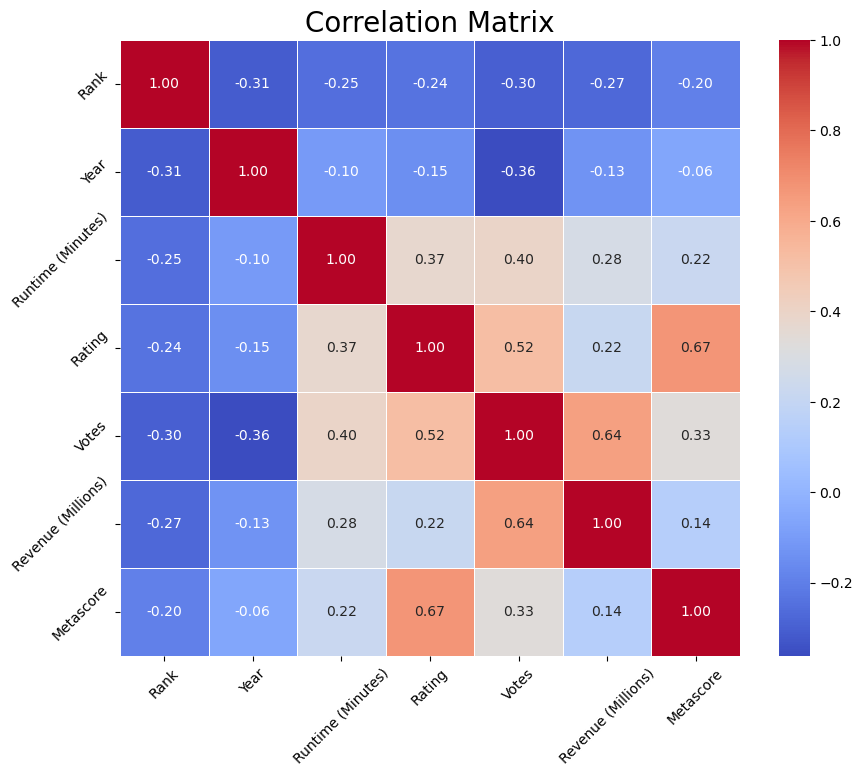

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis
correlation_matrix = data.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adding titles and labels
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show plot
plt.show()


### Genre Analysis


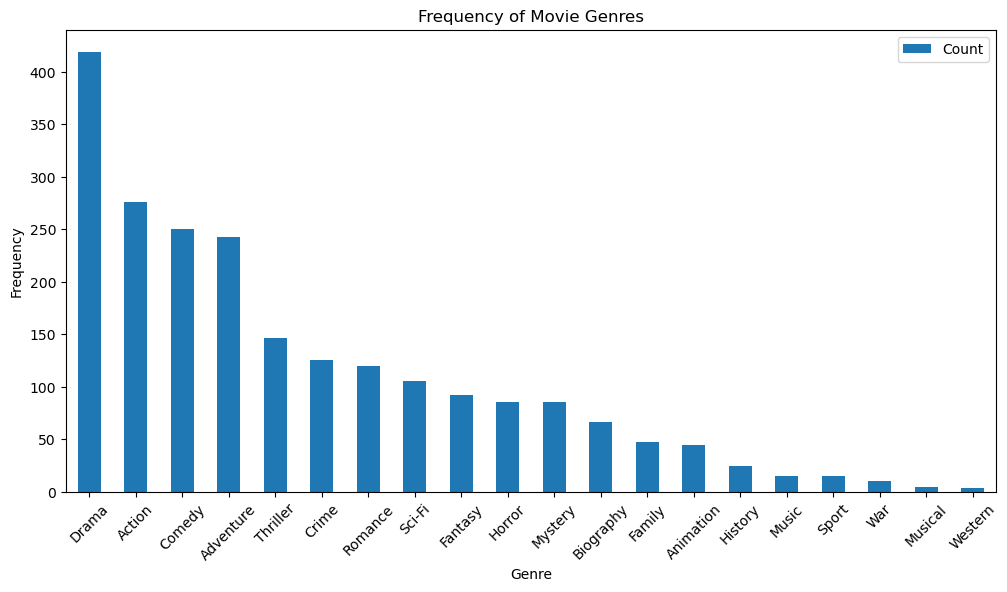

In [78]:
from collections import Counter

# Flatten the list of genres and count the frequency of each genre
genre_counts = Counter([genre for sublist in data['Genre'] for genre in sublist])

# Convert to DataFrame for easy plotting
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count'])

# Plotting
genre_df.sort_values('Count', ascending=False).plot(kind='bar', figsize=(12, 6))

plt.title('Frequency of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


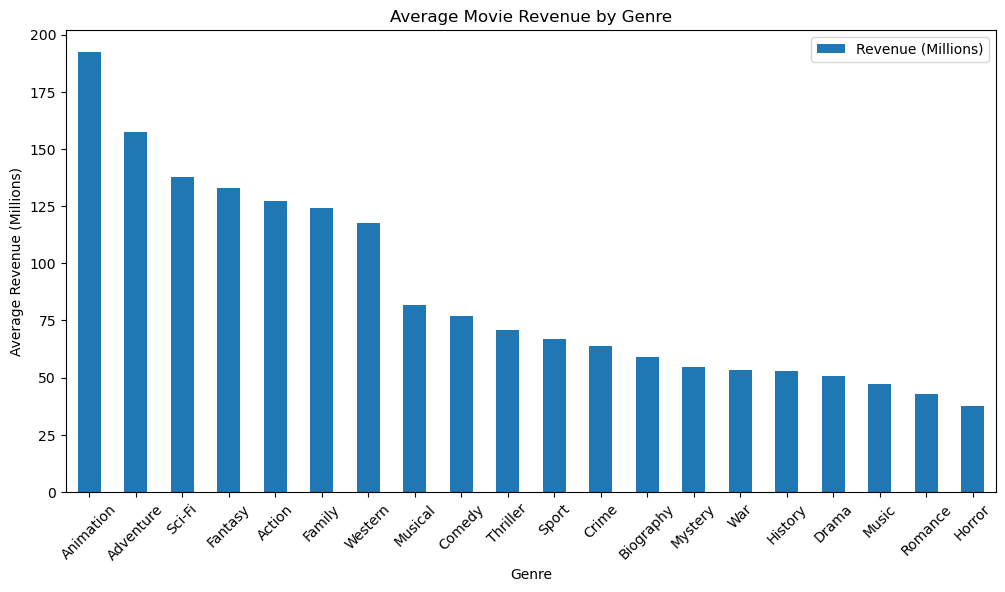

In [79]:
expanded_genre_revenue = []
for index, row in data.iterrows():
    for genre in row['Genre']:
        expanded_genre_revenue.append({'Genre': genre, 'Revenue (Millions)': row['Revenue (Millions)']})

expanded_genre_revenue_df = pd.DataFrame(expanded_genre_revenue)

# Group by genre and calculate average revenue
average_revenue_by_genre = expanded_genre_revenue_df.groupby('Genre')['Revenue (Millions)'].mean().sort_values(ascending=False)

# Convert to DataFrame for easy plotting
average_revenue_by_genre_df = pd.DataFrame(average_revenue_by_genre).reset_index()

# Plotting
average_revenue_by_genre_df.plot(x='Genre', y='Revenue (Millions)', kind='bar', figsize=(12, 6))

plt.title('Average Movie Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue (Millions)')
plt.xticks(rotation=45)
plt.show()


### Actor Analysis


#### Most frequent actors in movies

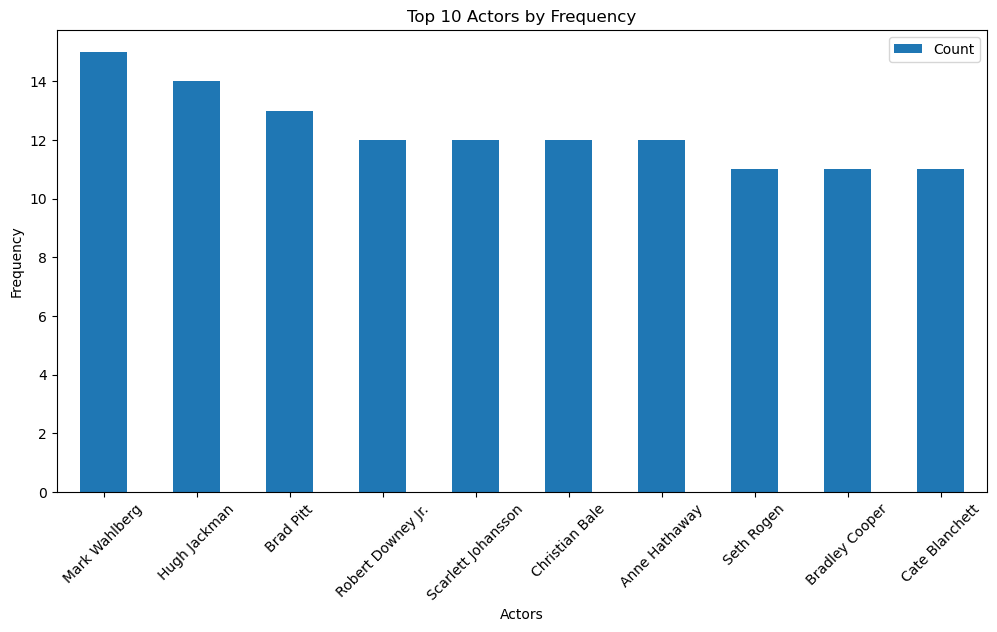

In [80]:
# Flatten the list of actors and count the frequency of each one
actor_counts = Counter([actor for sublist in data['Actors'] for actor in sublist])

# Convert to DataFrame for easy plotting
actor_df = pd.DataFrame.from_dict(actor_counts, orient='index', columns=['Count'])

# Sort the DataFrame and select the top 10
top_actors_df = actor_df.sort_values('Count', ascending=False).head(10)

# Plotting
top_actors_df.plot(kind='bar', figsize=(12, 6))

plt.title('Top 10 Actors by Frequency')
plt.xlabel('Actors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Actors and Movie Revenue

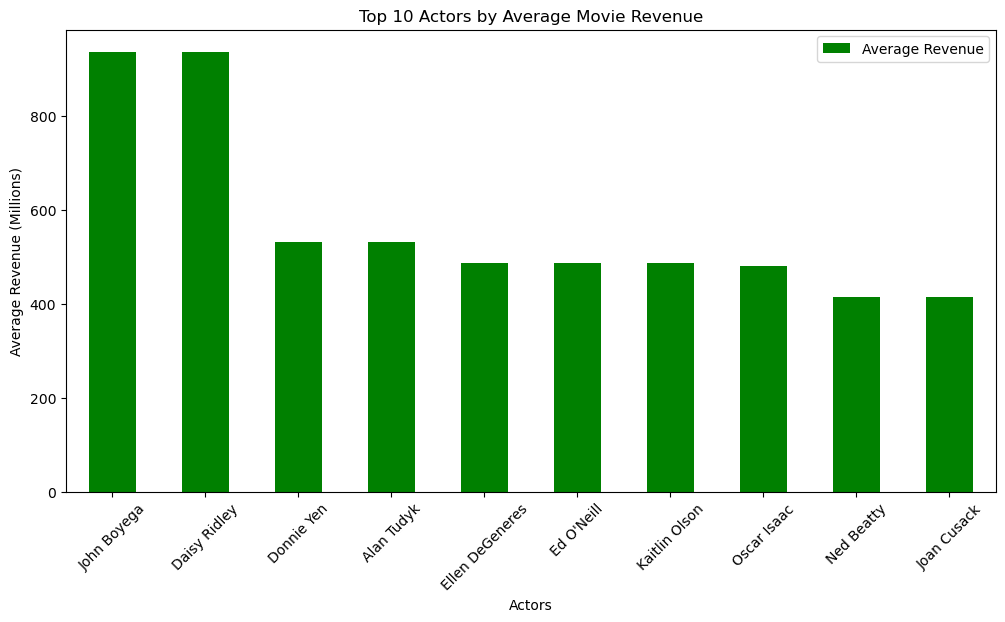

In [81]:
actor_revenues = {actor: [] for actor in actor_counts}
for index, row in data.iterrows():
    for actor in row['Actors']:
        actor_revenues[actor].append(row['Revenue (Millions)'])

# Calculate the average revenue for each actor
average_revenues = {actor: sum(revenues)/len(revenues) if revenues else 0 for actor, revenues in actor_revenues.items()}

# Convert to DataFrame and sort
average_revenues_df = pd.DataFrame.from_dict(average_revenues, orient='index', columns=['Average Revenue'])
top_actors_revenue_df = average_revenues_df.sort_values('Average Revenue', ascending=False).head(10)
top_actors_revenue_df.plot(kind='bar', color='green', figsize=(12, 6))

plt.title('Top 10 Actors by Average Movie Revenue')
plt.xlabel('Actors')
plt.ylabel('Average Revenue (Millions)')
plt.xticks(rotation=45)
plt.show()


### Director Analysis

In [82]:
# Calculate the average rating and revenue for each director
director_avg_stats = data.groupby('Director').agg({'Rating': 'mean', 'Revenue (Millions)': 'mean'}).reset_index()


In [83]:
# Top 10 directors by average rating
top10_directors_by_rating = director_avg_stats.sort_values(by='Rating', ascending=False).head(10)

# Top 10 directors by average revenue
top10_directors_by_revenue = director_avg_stats.sort_values(by='Revenue (Millions)', ascending=False).head(10)

# Apply styling to the DataFrames
styled_top10_directors_by_rating = top10_directors_by_rating.style.set_table_attributes("style='display:inline'").set_caption('Top 10 Directors by Average Movie Rating').background_gradient(cmap='viridis').format({'Rating': "{:.2f}", 'Revenue (Millions)': "${:,.2f}"})
styled_top10_directors_by_revenue = top10_directors_by_revenue.style.set_table_attributes("style='display:inline'").set_caption('Top 10 Directors by Average Movie Revenue').background_gradient(cmap='plasma').format({'Rating': "{:.2f}", 'Revenue (Millions)': "${:,.2f}"})

# Displaying the styled results
from IPython.display import display, HTML

display(HTML(styled_top10_directors_by_rating._repr_html_()))
display(HTML("<br>"))  # Adding space between tables
display(HTML(styled_top10_directors_by_revenue._repr_html_()))



,Director,Rating,Revenue (Millions)
88,Christopher Nolan,8.68,$303.02
317,Makoto Shinkai,8.60,$4.68
377,Olivier Nakache,8.60,$13.18
0,Aamir Khan,8.50,$1.20
154,Florian Henckel von Donnersmarck,8.50,$11.28
97,Damien Chazelle,8.40,$82.08
489,Thomas Vinterberg,8.30,$0.61
304,Lee Unkrich,8.30,$414.98
407,Rajkumar Hirani,8.30,$8.54
392,Pete Docter,8.25,$324.72


,Director,Rating,Revenue (Millions)
205,James Cameron,7.80,$760.51
92,Colin Trevorrow,7.00,$652.18
273,Joss Whedon,7.75,$541.13
304,Lee Unkrich,8.30,$414.98
167,Gary Ross,7.20,$408.00
77,Chris Buck,7.50,$400.74
80,Chris Renaud,6.60,$368.31
164,Gareth Edwards,7.15,$366.41
493,Tim Miller,8.00,$363.02
70,Byron Howard,8.10,$341.26


### Movie Analysis

#### Average rating per year

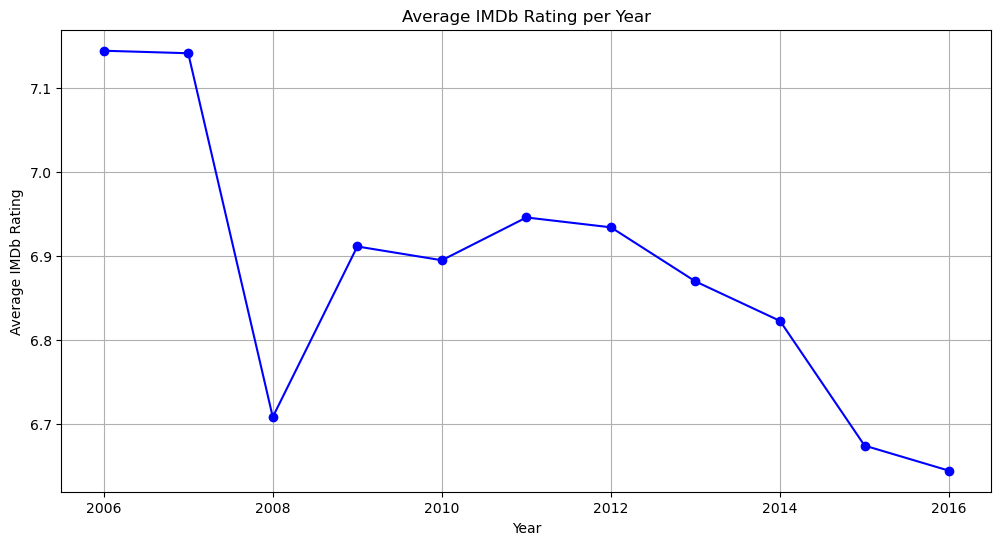

In [84]:
# Grouping by 'Year' and calculating the mean IMDb rating
average_ratings_by_year = data.groupby('Year')['Rating'].mean()

# Creating a line plot
plt.figure(figsize=(12, 6))
average_ratings_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Average IMDb Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.grid(True)
plt.show()

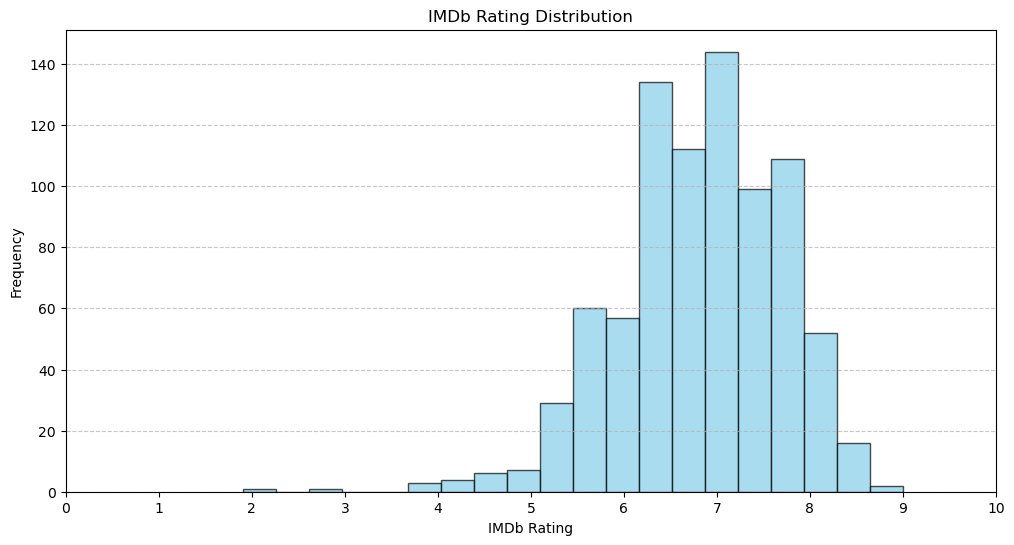

In [85]:
# IMDb ratings
ratings = data['Rating']

# Creating a histogram
plt.figure(figsize=(12, 6))
plt.hist(ratings, bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('IMDb Rating Distribution')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 11))
plt.show()

## Actors Network

#### Actor collaboration graph (Largest connected component)

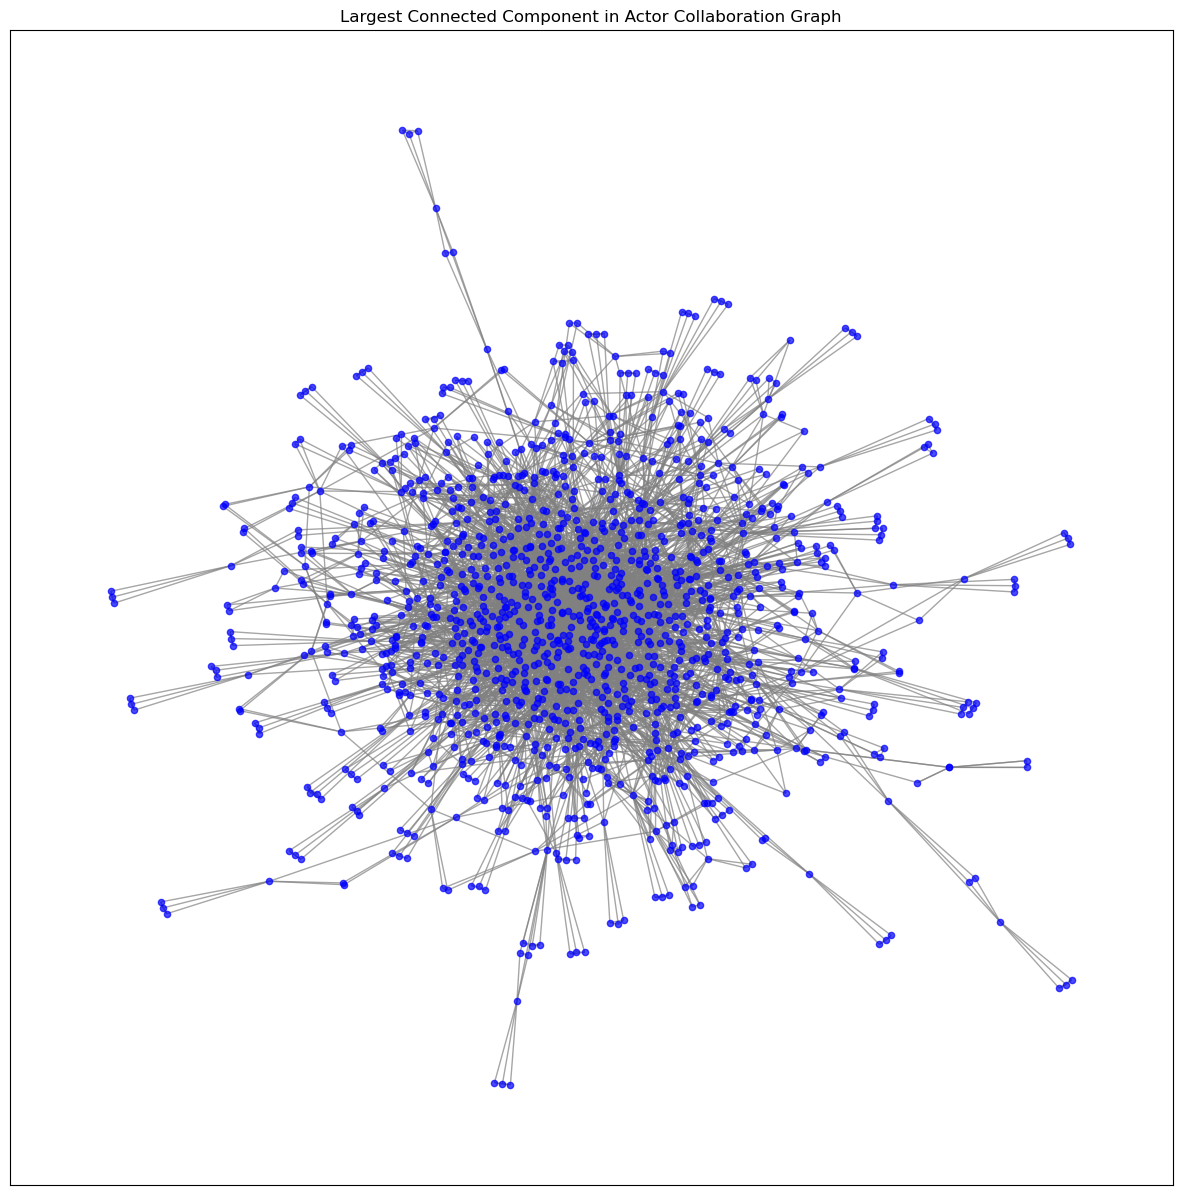

In [86]:
import itertools
import networkx as nx

# List of all pairs of actors who have appeared together
actor_pairs = []

for actors in data['Actors']:
    for pair in itertools.combinations(actors, 2):
        actor_pairs.append(pair)

# Deduplicate list
actor_pairs = list(set(actor_pairs))

# Create the graph 
G = nx.Graph()
for pair in actor_pairs:
    G.add_edge(pair[0], pair[1])

# Identify the largest connected component
largest_cc = max(nx.connected_components(G), key=len)

# Create a subgraph from the largest connected component
largest_cc_subgraph = G.subgraph(largest_cc)

# Draw the largest connected component subgraph
plt.figure(figsize=(15, 15))
nx.draw_networkx(largest_cc_subgraph, with_labels=False, node_size=20, node_color='blue', alpha=0.7, edge_color='grey')
plt.title("Largest Connected Component in Actor Collaboration Graph")
plt.show()



#### Actors with highest degree centrality  

In [87]:
degree_centrality = nx.degree_centrality(largest_cc_subgraph)
# Sorting actors by degree centrality
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Getting the top 20 actors
top_20_actors_by_degree_centrality = sorted_degree_centrality[:20]

# Displaying the top 20 actors
for actor, centrality in top_20_actors_by_degree_centrality:
    print(f"{actor}: {centrality}")

Mark Wahlberg: 0.03125
Hugh Jackman: 0.03050595238095238
Brad Pitt: 0.027529761904761904
Christian Bale: 0.025297619047619048
Anne Hathaway: 0.024553571428571428
Jake Gyllenhaal: 0.024553571428571428
Cate Blanchett: 0.023809523809523808
Scarlett Johansson: 0.023809523809523808
Michael Fassbender: 0.02306547619047619
Tom Hardy: 0.02232142857142857
Leonardo DiCaprio: 0.02232142857142857
Chloë Grace Moretz: 0.021577380952380952
Bradley Cooper: 0.020833333333333332
Seth Rogen: 0.020833333333333332
Anna Kendrick: 0.020833333333333332
Ben Kingsley: 0.020089285714285712
Tom Hanks: 0.020089285714285712
Ryan Gosling: 0.020089285714285712
Chris Hemsworth: 0.020089285714285712
Emma Stone: 0.020089285714285712


These actors are the most connected within the largest component the collaboration network, indicating that they have worked with a larger variety of actors compared to others.

#### Actors with highest eigenvector centrality  

In [88]:
eigenvector_centrality = nx.eigenvector_centrality(largest_cc_subgraph)
# Sorting actors by eigenvector centrality
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Getting the top 20 actors
top_20_actors_by_eigen_centrality = sorted_eigenvector_centrality[:20]

# Displaying the top 20 actors
for actor, centrality in top_20_actors_by_eigen_centrality:
    print(f"{actor}: {centrality}")

Christian Bale: 0.19511741524470286
Hugh Jackman: 0.14876398551793185
Scarlett Johansson: 0.14417679901836775
Mark Wahlberg: 0.14199203907851396
Anne Hathaway: 0.13837660658109846
Brad Pitt: 0.13835939049914173
Jake Gyllenhaal: 0.1251816628554414
Leonardo DiCaprio: 0.12481285558738262
Tom Hardy: 0.11571622449725619
Amy Adams: 0.10924052545674205
Michael Fassbender: 0.10741211174088254
Joel Edgerton: 0.10383288609307455
Ben Kingsley: 0.10320826377503187
Jessica Chastain: 0.10251810378352309
Matthew McConaughey: 0.10137768002089893
Russell Crowe: 0.09960509715665676
Anna Kendrick: 0.09878127964465264
Robert Downey Jr.: 0.09749209316019768
Matt Damon: 0.09739045974924024
Cate Blanchett: 0.09733993113198115


These actors are likely to be those who have not only been prolific in their careers but also have collaborated with other significant actors.

#### Degree Distribution and Mean degree

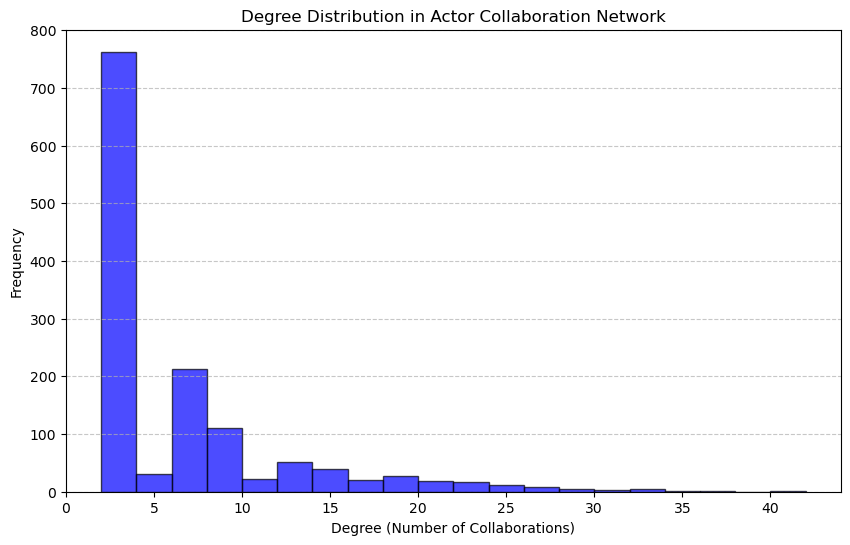

In [89]:
# Calculate the degree of each node in the network
degrees = dict(largest_cc_subgraph.degree())

# Get the list of degrees
degree_values = list(degrees.values())

# Plot the degree distribution as a histogram
plt.figure(figsize=(10, 6))
plt.hist(degree_values, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title("Degree Distribution in Actor Collaboration Network")
plt.xlabel("Degree (Number of Collaborations)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Predictive models 

### Multiple Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression

# Creating and training the model
mlr_regressor = LinearRegression()
mlr_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred_mlr = mlr_regressor.predict(X_test)

# Evaluating the MLR model using the same metrics
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

print(f"Multiple Linear Regression - Mean Absolute Error (MAE): {mae_mlr}")
print(f"Multiple Linear Regression - Mean Squared Error (MSE): {mse_mlr}")
print(f"Multiple Linear Regression - Root Mean Squared Error (RMSE): {rmse_mlr}")
print(f"Multiple Linear Regression - Coefficient of Determination (R²): {r2_mlr}")


Multiple Linear Regression - Mean Absolute Error (MAE): 0.3639052082489747
Multiple Linear Regression - Mean Squared Error (MSE): 0.217299828496485
Multiple Linear Regression - Root Mean Squared Error (RMSE): 0.46615429687656534
Multiple Linear Regression - Coefficient of Determination (R²): 0.6833923371043202


### Random Forest

In [118]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Extracting features and target
features = data[['Year', 'Runtime (Minutes)', 'Votes', 'Revenue (Millions)', 'Metascore']]
target = data['Rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating and training the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=1, random_state=42)  # Using 1 tree for visualization
rf_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculating metrics
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(mse)
rf_r2 = r2_score(y_test, y_pred)

print(f"Random Forest - Mean Absolute Error (MAE): {rf_mae}")
print(f"Random Forest - Mean Squared Error (MSE): {rf_mse}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"Random Forest - Coefficient of Determination (R²): {rf_r2}")





Random Forest - Mean Absolute Error (MAE): 0.580952380952381
Random Forest - Mean Squared Error (MSE): 0.6413095238095239
Random Forest - Root Mean Squared Error (RMSE): 0.8008180341435399
Random Forest - Coefficient of Determination (R²): 0.0656066738250598


### Support Vector 

In [119]:
from sklearn.svm import SVR

# Creating and training the Support Vector Regressor
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred_svr = svr_regressor.predict(X_test)

# Evaluating the SVR model using the same metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - Mean Absolute Error (MAE): {mae_svr}")
print(f"Support Vector Regression - Mean Squared Error (MSE): {mse_svr}")
print(f"Support Vector Regression - Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"Support Vector Regression - Coefficient of Determination (R²): {r2_svr}")


Support Vector Regression - Mean Absolute Error (MAE): 0.5041383373864784
Support Vector Regression - Mean Squared Error (MSE): 0.41569947976903276
Support Vector Regression - Root Mean Squared Error (RMSE): 0.644747609355035
Support Vector Regression - Coefficient of Determination (R²): 0.3943223900945124


### Gradient Boosting 

In [120]:
from sklearn.ensemble import GradientBoostingRegressor

# Creating and training the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_regressor.predict(X_test)

# Calculating metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Absolute Error (MAE): {mae_gb}")
print(f"Gradient Boosting - Mean Squared Error (MSE): {mse_gb}")
print(f"Gradient Boosting - Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"Gradient Boosting - Coefficient of Determination (R²): {r2_gb}")


Gradient Boosting - Mean Absolute Error (MAE): 0.38700325855516565
Gradient Boosting - Mean Squared Error (MSE): 0.26531702005878594
Gradient Boosting - Root Mean Squared Error (RMSE): 0.515089332115106
Gradient Boosting - Coefficient of Determination (R²): 0.6134308884251274


### LASSO

In [121]:
from sklearn.linear_model import Lasso, LassoCV

# Creating and training the Lasso Regression model with cross-validation to find the best alpha
lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# The best model
best_lasso_model = lasso_cv

# Predictions on the test set
y_pred_lasso = best_lasso_model.predict(X_test)

# Evaluating the Lasso Regression model using the same metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - Mean Absolute Error (MAE): {mae_lasso}")
print(f"Lasso Regression - Mean Squared Error (MSE): {mse_lasso}")
print(f"Lasso Regression - Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"Lasso Regression - Coefficient of Determination (R²): {r2_lasso}")


Lasso Regression - Mean Absolute Error (MAE): 0.3635106682548562
Lasso Regression - Mean Squared Error (MSE): 0.216864491576325
Lasso Regression - Root Mean Squared Error (RMSE): 0.465687117683456
Lasso Regression - Coefficient of Determination (R²): 0.6840266266286964


## Comparing Models

In [123]:
metrics = {
    'Random Forest': {'MAE': rf_mae, 'MSE': rf_mse, 'RMSE': rf_rmse, 'R2': rf_r2},
    'Gradient Boosting': {'MAE': mae_gb, 'MSE': mse_gb, 'RMSE': rmse_gb, 'R2':r2_gb},
    'Support Vector Regression': {'MAE': mae_svr, 'MSE': mse_svr, 'RMSE': rmse_svr, 'R2': r2_svr},
    'Multiple Linear Regression': {'MAE': mae_mlr, 'MSE': mse_mlr, 'RMSE': rmse_mlr, 'R2': r2_mlr},
    'LASSO': {'MAE': mae_lasso, 'MSE': mse_lasso, 'RMSE': rmse_lasso, 'R2': r2_lasso} 
}

metrics_df = pd.DataFrame(metrics).T

sorted_metrics_df = metrics_df.sort_values(by=['MSE', 'R2'], ascending=[True, False])

sorted_metrics_df

,MAE,MSE,RMSE,R2
LASSO,0.363511,0.216864,0.465687,0.684027
Multiple Linear Regression,0.363905,0.217300,0.466154,0.683392
Gradient Boosting,0.387003,0.265317,0.515089,0.613431
Support Vector Regression,0.504138,0.415699,0.644748,0.394322
Random Forest,0.580952,0.641310,0.800818,0.065607


LASSO seems to be the most effective model

# Predictive models for future project success assesment

In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define feature sets
numerical_features = ['Year', 'Runtime (Minutes)']
categorical_features = ['Genre']
text_features = ['Title', 'Description']

# Handle missing values
data = data.dropna(subset=['Revenue (Millions)'])

# Preprocessing for text features
text_data = data[text_features].apply(lambda x: ' '.join(x), axis=1)
tfidf_vectorizer = TfidfVectorizer()
text_transformed = tfidf_vectorizer.fit_transform(text_data)

# Update data with transformed text features
data_transformed = pd.DataFrame(text_transformed.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=data.index)
data_transformed = pd.concat([data.drop(text_features, axis=1), data_transformed], axis=1)

# New feature list excluding the target variable
features = [col for col in data_transformed.columns if col != 'Revenue (Millions)']

# Splitting data
X = data_transformed[features]
y = data['Revenue (Millions)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pipeline with preprocessor and Gradient Boosting Regressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor(random_state=42))])

# Training the model
model.fit(X_train, y_train)

# Predicting and Evaluating the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 26.833019368662907
Mean Squared Error (MSE): 958.3638125332587
Root Mean Squared Error (RMSE): 30.957451647919257
R² Score: -0.13922289705430746
